# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
# from pandas import datetime
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
import datetime

# Importing Dataset

In [2]:
df = pd.read_csv("./dataset.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-03,41.299999,41.685001,39.400002,40.525002,29.296358,185090.0
1,2008-10-06,39.700001,40.799999,37.200001,39.564999,28.602345,204340.0
2,2008-10-07,40.000000,40.599998,36.000000,36.119999,26.111885,128970.0
3,2008-10-08,35.000000,44.400002,34.500000,40.880001,29.552996,700490.0
4,2008-10-10,40.400002,40.400002,35.299999,37.910000,27.405914,367380.0


In [4]:
col_names = ['Date','Open','High','Low','Close','Volume','Adj Close']
stocks = pd.read_csv("./dataset.csv",header=0,names=col_names)
df = pd.DataFrame(stocks)
date_split = df['Date'].str.split('-').str
df['Year'],df['Month'],df['Day'] = date_split
df["Volume"]=df["Volume"]/10000

C:\Users\Struth\anaconda3\envs\tendf\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2.459000e+03
mean,79.930561,81.670230,78.097025,79.775392,0.007593,1.021129e+06
std,79.801599,81.197380,77.985128,79.564786,0.008097,1.842039e+06
min,22.500000,23.000000,21.250000,22.100000,0.001674,0.000000e+00
25%,32.350001,33.250000,31.500000,32.324998,0.002858,1.258995e+05
50%,47.950001,48.950001,46.750000,47.849998,0.003922,3.919700e+05
75%,68.450001,70.000000,66.775002,68.225003,0.006481,1.199598e+06
max,338.950012,342.000000,330.799988,339.200012,0.033885,3.026019e+07


In [6]:
df.drop(df.columns[[0,3]],axis=1,inplace=True)
df.head()

,Open,High,Close,Volume,Adj Close,Year,Month,Day
0,41.299999,41.685001,40.525002,0.002930,185090.0,2008,10,03
1,39.700001,40.799999,39.564999,0.002860,204340.0,2008,10,06
2,40.000000,40.599998,36.119999,0.002611,128970.0,2008,10,07
3,35.000000,44.400002,40.880001,0.002955,700490.0,2008,10,08
4,40.400002,40.400002,37.910000,0.002741,367380.0,2008,10,10


In [7]:
df['Open'].shape

(2467,)

In [8]:
df['High'].shape

(2467,)

In [9]:
df['Close'].shape

(2467,)

In [10]:
df['Volume'].shape

(2467,)

In [11]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

       Open     High    Close    Volume  Adj Close  Year Month Day
0     0.413  0.41685  0.40525  0.292964   185090.0  2008    10  03
1     0.397  0.40800  0.39565  0.286023   204340.0  2008    10  06
2     0.400  0.40600  0.36120  0.261119   128970.0  2008    10  07
3     0.350  0.44400  0.40880  0.295530   700490.0  2008    10  08
4     0.404  0.40400  0.37910  0.274059   367380.0  2008    10  10
...     ...      ...      ...       ...        ...   ...   ...  ..
2462  2.180  2.21000  2.18550  2.185500  5014613.0  2018    09  25
2463  2.215  2.21500  2.12150  2.121500  3303414.0  2018    09  26
2464  2.132  2.14450  1.89400  1.894000  9492583.0  2018    09  27
2465  1.914  1.98850  1.89500  1.895000  6458894.0  2018    09  28
2466  1.890  1.90900  1.87000  1.870000  6270237.0  2018    10  01

[2467 rows x 8 columns]


C:\Users\Struth\anaconda3\envs\tendf\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Struth\anaconda3\envs\tendf\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Struth\anaconda3\envs\tendf\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [12]:
df.head()

,Open,High,Close,Volume,Adj Close,Year,Month,Day
0,0.413,0.41685,0.40525,0.292964,185090.0,2008,10,03
1,0.397,0.40800,0.39565,0.286023,204340.0,2008,10,06
2,0.400,0.40600,0.36120,0.261119,128970.0,2008,10,07
3,0.350,0.44400,0.40880,0.295530,700490.0,2008,10,08
4,0.404,0.40400,0.37910,0.274059,367380.0,2008,10,10


In [13]:
# df = df.fillna(df.mean())

In [14]:
X = df[['Open','High','Adj Close','Volume']]
Y = df[['Close']]

In [15]:
X.head()

,Open,High,Adj Close,Volume
0,0.413,0.41685,185090.0,0.292964
1,0.397,0.40800,204340.0,0.286023
2,0.400,0.40600,128970.0,0.261119
3,0.350,0.44400,700490.0,0.295530
4,0.404,0.40400,367380.0,0.274059


In [16]:
Y.head()

,Close
0,0.40525
1,0.39565
2,0.36120
3,0.40880
4,0.37910


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# X = df[['High','Open', 'Volume']]
# X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [19]:
X_train.head()

,High,Open,Volume
0,0.41685,0.413,0.292964
1,0.40800,0.397,0.286023
2,0.40600,0.400,0.261119
3,0.44400,0.350,0.295530
4,0.40400,0.404,0.274059


In [20]:
X_test.head()

,High,Open,Volume
1973,1.2380,1.2300,1.184628
1974,1.2265,1.2220,1.185116
1975,1.2225,1.2210,1.158737
1976,1.2480,1.1930,1.190978
1977,1.2225,1.2115,1.165576


In [21]:
Y_train.head()

,Close
0,0.40525
1,0.39565
2,0.36120
3,0.40880
4,0.37910


In [22]:
Y_test.head()

,Close
1973,1.2125
1974,1.2130
1975,1.1860
1976,1.2190
1977,1.1930


In [23]:
X_train.describe()

,High,Open,Volume
count,1973.000000,1973.000000,1973.000000
mean,0.451708,0.440740,0.395116
std,0.174703,0.170431,0.174230
min,0.000000,0.000000,0.000000
25%,0.312500,0.305000,0.276199
50%,0.417000,0.406000,0.333667
75%,0.564500,0.551000,0.512665
max,1.260000,1.229000,1.199772


In [24]:
print(X_train.shape,"   ",Y_train.shape)

(1973, 3)     (1973, 1)


In [25]:
X_test.size

1482

# Training artificial neural network

In [26]:
ann = Sequential()
ann.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=3))

In [27]:
ann.add(Dense(units=16,kernel_initializer='uniform',activation='relu'))

In [28]:
ann.add(Dense(units=1,kernel_initializer='uniform',activation='linear'))

In [29]:
ann.compile(optimizer='adam',loss='mean_squared_error',metrics=[])

In [30]:
ann.fit(X_train,Y_train,batch_size=150,epochs=100,validation_split=0.05)

Epoch 1/100
13/13 [==============================] - 1s 31ms/step - loss: 0.1878 - val_loss: 0.8240
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1738 - val_loss: 0.7897
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1622 - val_loss: 0.7423
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1408 - val_loss: 0.6714
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1175 - val_loss: 0.5690
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0880 - val_loss: 0.4354
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0522 - val_loss: 0.2872
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0232 - val_loss: 0.1602
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.0891
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.0709
Epoch 11

13/13 [==============================] - 0s 4ms/step - loss: 1.5030e-04 - val_loss: 2.4899e-04
Epoch 81/100
13/13 [==============================] - 0s 4ms/step - loss: 1.4439e-04 - val_loss: 2.4710e-04
Epoch 82/100
13/13 [==============================] - 0s 4ms/step - loss: 1.3800e-04 - val_loss: 2.5341e-04
Epoch 83/100
13/13 [==============================] - 0s 5ms/step - loss: 1.2367e-04 - val_loss: 2.5588e-04
Epoch 84/100
13/13 [==============================] - 0s 4ms/step - loss: 1.4160e-04 - val_loss: 2.5083e-04
Epoch 85/100
13/13 [==============================] - 0s 4ms/step - loss: 1.3565e-04 - val_loss: 2.5988e-04
Epoch 86/100
13/13 [==============================] - 0s 5ms/step - loss: 1.3446e-04 - val_loss: 2.5648e-04
Epoch 87/100
13/13 [==============================] - 0s 4ms/step - loss: 1.3066e-04 - val_loss: 2.6576e-04
Epoch 88/100
13/13 [==============================] - 0s 4ms/step - loss: 1.3169e-04 - val_loss: 2.6616e-04
Epoch 89/100
13/13 [=====================

In [31]:
predictions = ann.predict(X_test)

In [32]:
predictions

array([[1.2214334 ],
       [1.2152439 ],
       [1.2047293 ],
       [1.2145323 ],
       [1.203887  ],
       [1.196391  ],
       [1.17702   ],
       [1.1788212 ],
       [1.1812971 ],
       [1.2349491 ],
       [1.2713861 ],
       [1.2514262 ],
       [1.2446498 ],
       [1.2398115 ],
       [1.2405124 ],
       [1.2338799 ],
       [1.219624  ],
       [1.2258837 ],
       [1.1937755 ],
       [1.1705762 ],
       [1.137234  ],
       [1.1271838 ],
       [1.1187631 ],
       [1.042054  ],
       [1.100508  ],
       [1.0691981 ],
       [0.99724805],
       [0.9521613 ],
       [0.93868774],
       [0.93070626],
       [0.9230925 ],
       [0.9098899 ],
       [0.9388243 ],
       [0.92620325],
       [0.93978   ],
       [0.99968493],
       [1.0229467 ],
       [1.0262176 ],
       [1.0119126 ],
       [0.9830107 ],
       [0.95857024],
       [0.96033937],
       [0.95428586],
       [0.9526126 ],
       [0.9564266 ],
       [0.945938  ],
       [0.9302119 ],
       [0.924

In [33]:
X_train

,High,Open,Volume
0,0.41685,0.4130,0.292964
1,0.40800,0.3970,0.286023
2,0.40600,0.4000,0.261119
3,0.44400,0.3500,0.295530
4,0.40400,0.4040,0.274059
...,...,...,...
1968,1.22100,1.2050,1.169973
1969,1.21400,1.1945,1.161180
1970,1.20900,1.2000,1.052731
1971,1.14850,1.0690,1.111352


In [34]:
X_test

,High,Open,Volume
1973,1.2380,1.2300,1.184628
1974,1.2265,1.2220,1.185116
1975,1.2225,1.2210,1.158737
1976,1.2480,1.1930,1.190978
1977,1.2225,1.2115,1.165576
...,...,...,...
2462,2.2100,2.1800,2.185500
2463,2.2150,2.2150,2.121500
2464,2.1445,2.1320,1.894000
2465,1.9885,1.9140,1.895000


In [35]:
print(Y_test,"   ",predictions)

       Close
1973  1.2125
1974  1.2130
1975  1.1860
1976  1.2190
1977  1.1930
...      ...
2462  2.1855
2463  2.1215
2464  1.8940
2465  1.8950
2466  1.8700

[494 rows x 1 columns]     [[1.2214334 ]
 [1.2152439 ]
 [1.2047293 ]
 [1.2145323 ]
 [1.203887  ]
 [1.196391  ]
 [1.17702   ]
 [1.1788212 ]
 [1.1812971 ]
 [1.2349491 ]
 [1.2713861 ]
 [1.2514262 ]
 [1.2446498 ]
 [1.2398115 ]
 [1.2405124 ]
 [1.2338799 ]
 [1.219624  ]
 [1.2258837 ]
 [1.1937755 ]
 [1.1705762 ]
 [1.137234  ]
 [1.1271838 ]
 [1.1187631 ]
 [1.042054  ]
 [1.100508  ]
 [1.0691981 ]
 [0.99724805]
 [0.9521613 ]
 [0.93868774]
 [0.93070626]
 [0.9230925 ]
 [0.9098899 ]
 [0.9388243 ]
 [0.92620325]
 [0.93978   ]
 [0.99968493]
 [1.0229467 ]
 [1.0262176 ]
 [1.0119126 ]
 [0.9830107 ]
 [0.95857024]
 [0.96033937]
 [0.95428586]
 [0.9526126 ]
 [0.9564266 ]
 [0.945938  ]
 [0.9302119 ]
 [0.92444485]
 [0.89722186]
 [0.8677341 ]
 [0.86620194]
 [0.912087  ]
 [0.9523852 ]
 [0.9650057 ]
 [0.9758323 ]
 [0.9568521 ]
 [0.9454464 ]
 [0.96760595]
 [0.

In [36]:

trainScore = ann.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = ann.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00 MSE (0.01 RMSE)
Test Score: 0.00 MSE (0.03 RMSE)


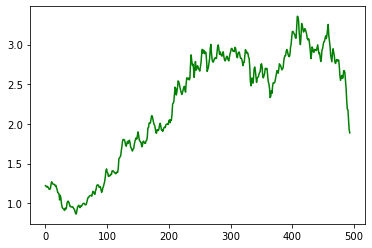

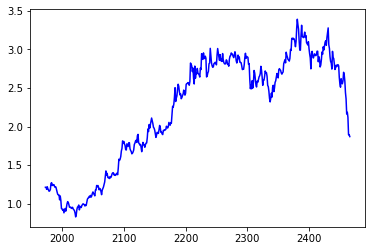

In [37]:
plt.plot(predictions,color='green',label='model')
plt.show()
plt.plot(Y_test,color='blue',label='value')
plt.show()